<h2><b>Importing Requirements</b></h2>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns


<h2><b>Data Loading</b></h2>

In [ ]:
df = pd.read_csv("heart.csv") 

<br>Data Info:<br>

In [404]:
df.shape

(918, 12)

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [406]:
df['Sex'] = df['Sex'].map({'M': 'Male', 'F': 'Female'})


In [407]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Male,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,Female,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,Male,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,Female,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,Male,NAP,150,195,0,Normal,122,N,0.0,Up,0


<b>Missing Values</b>


 Handling Missing Values of our Dataframe
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


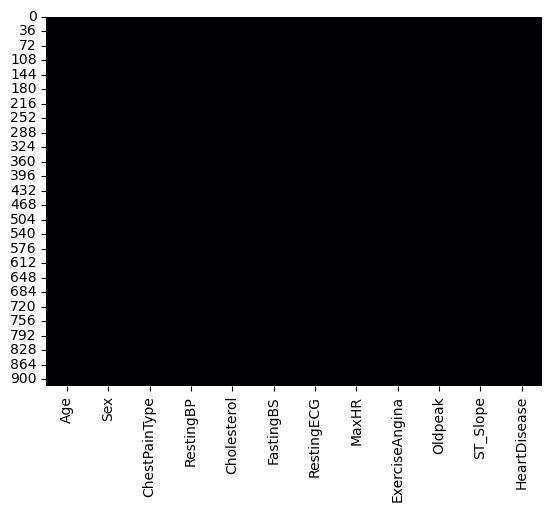

In [ ]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

print("\n Handling Missing Values of our Dataframe")
print(df.isnull().sum())


Checking Duplicate Values

In [ ]:

duplicates = df[df.duplicated()]

print(f"Repeated coloumn value: {duplicates.shape[0]}")


Repeated coloumn value: 0


In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

print("Numerical Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Categorical Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


<b>Outliers</b>

In [ ]:
outliers_iqr = pd.DataFrame()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outliers_iqr = pd.concat([outliers_iqr, outlier_rows])


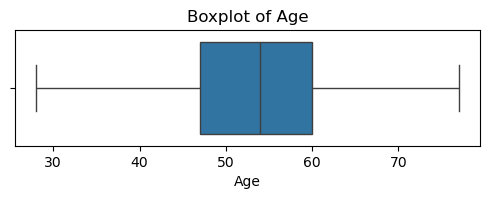

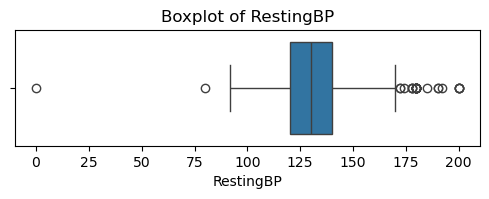

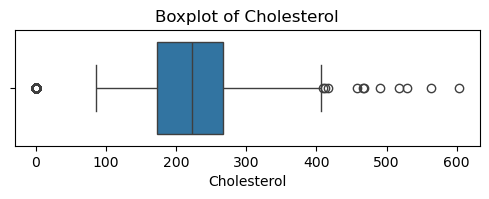

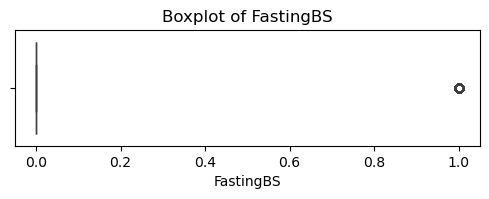

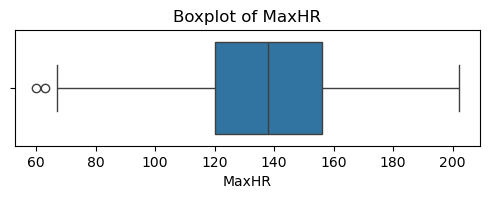

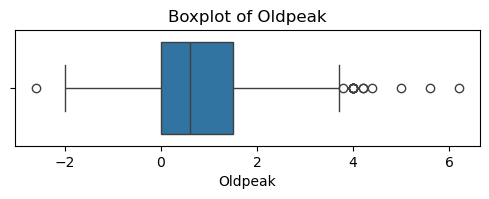

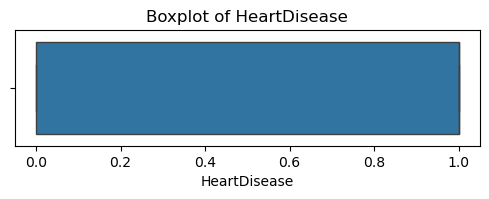

In [412]:
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
df = df[(df['Cholesterol'] >= 120) & (df['Cholesterol'] <= 350)]

Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Cholesterol'] < (Q1 - 1.5*IQR)) | (df['Cholesterol'] > (Q3 + 1.5*IQR)))]


In [ ]:
outliers_iqr = outliers_iqr.drop_duplicates()

outliers_iqr


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,Male,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,Female,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,Male,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,Male,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,Male,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
775,38,Male,TA,120,231,0,Normal,182,Y,3.8,Flat,1
791,51,Male,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,Female,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,Male,ASY,114,318,0,ST,140,N,4.4,Down,1


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

df1 = df.copy(deep=True)

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    le_dict[col] = le  

mms = MinMaxScaler()
scaler = StandardScaler()

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])

cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])




In [416]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.349733,1,1,0.416117,1.088381,0,1,1.279800,0,0.015873,2,0
1,-0.399828,0,2,1.579384,-1.289359,0,1,0.629873,0,0.174603,1,1
2,-1.666368,1,1,-0.165517,0.957496,0,2,-1.726112,0,0.015873,2,0
3,-0.505373,0,0,0.299790,-0.547678,0,1,-1.319907,1,0.253968,1,1
4,0.127897,1,2,0.997751,-0.962147,0,1,-0.751222,0,0.015873,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.822008,1,3,-1.328784,0.543028,0,1,-0.345017,0,0.206349,1,1
914,1.605528,1,0,0.648770,-1.005775,1,1,0.020567,0,0.555556,1,1
915,0.444533,1,0,-0.165517,-2.358251,0,1,-1.035565,1,0.206349,1,1
916,0.444533,0,1,-0.165517,-0.067768,0,0,1.361041,0,0.015873,1,1


<br>Visualization<br>

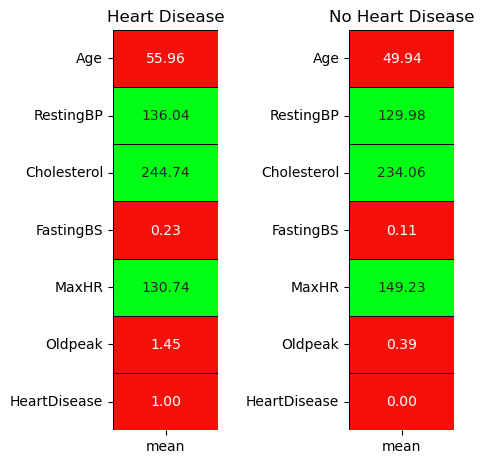

In [417]:
yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T
colors = ["#F6100C","#00FF15"]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

Mean values of all the features for cases of heart diseases and non-heart diseases.


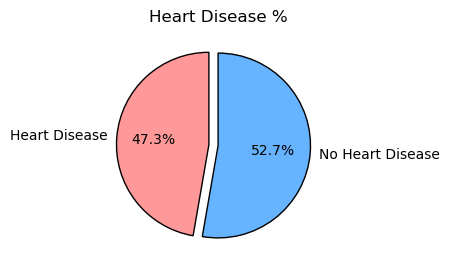

In [ ]:

l = list(df['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

colors = ['#ff9999', '#66b3ff'] 

plt.figure(figsize=(3, 3))
plt.pie(circle, 
        labels=['Heart Disease', 'No Heart Disease'], 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=(0.1, 0), 
        colors=colors, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')
plt.show()



In [419]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.349733,1,1,0.416117,1.088381,0,1,1.279800,0,0.015873,2,0
1,-0.399828,0,2,1.579384,-1.289359,0,1,0.629873,0,0.174603,1,1
2,-1.666368,1,1,-0.165517,0.957496,0,2,-1.726112,0,0.015873,2,0
3,-0.505373,0,0,0.299790,-0.547678,0,1,-1.319907,1,0.253968,1,1
4,0.127897,1,2,0.997751,-0.962147,0,1,-0.751222,0,0.015873,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.822008,1,3,-1.328784,0.543028,0,1,-0.345017,0,0.206349,1,1
914,1.605528,1,0,0.648770,-1.005775,1,1,0.020567,0,0.555556,1,1
915,0.444533,1,0,-0.165517,-2.358251,0,1,-1.035565,1,0.206349,1,1
916,0.444533,0,1,-0.165517,-0.067768,0,0,1.361041,0,0.015873,1,1


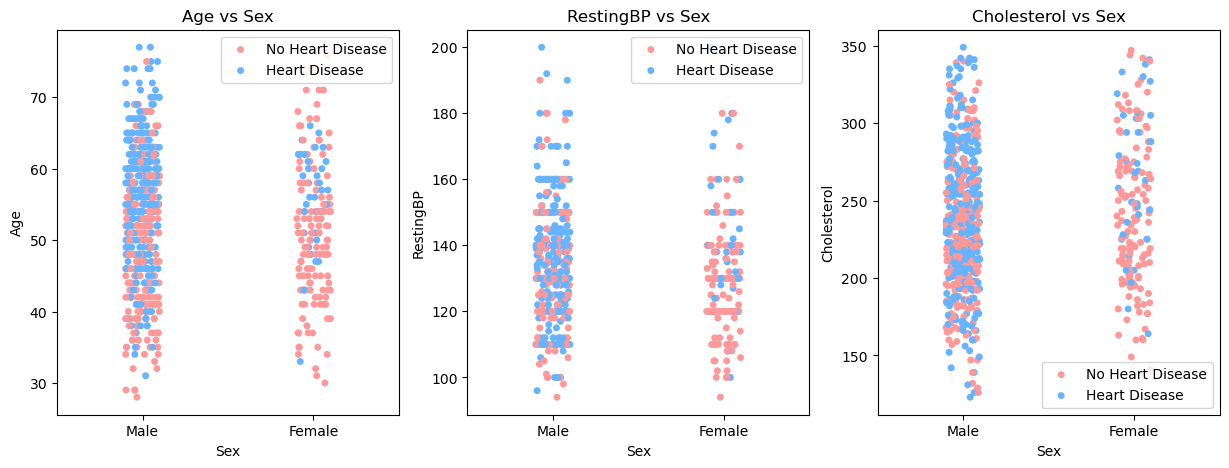

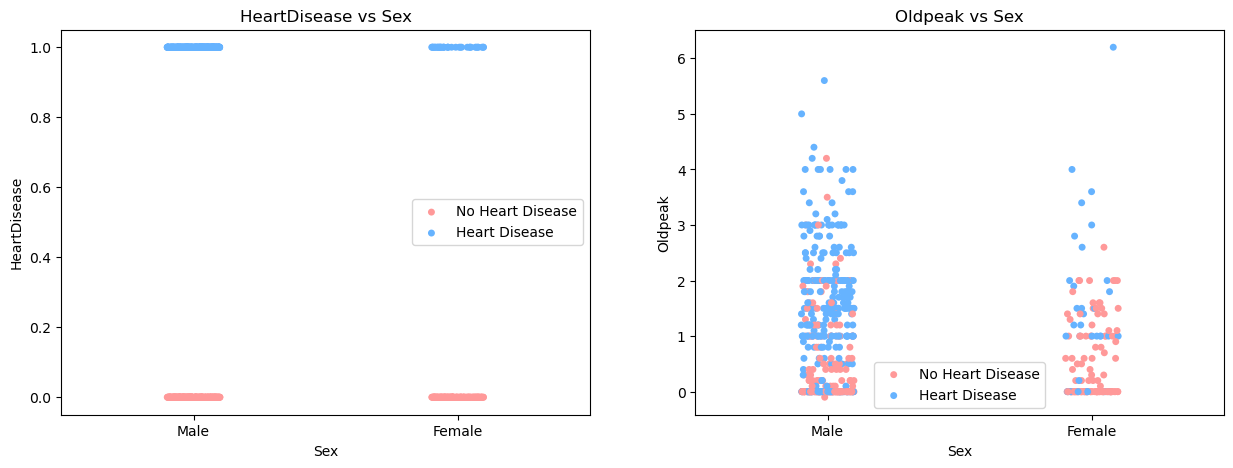

In [420]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numeric_cols[i],data = df,hue = 'HeartDisease',palette = colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numeric_cols[i] + ' vs Sex' 
    plt.title(title)

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numeric_cols[i],data = df,hue = 'HeartDisease',palette = colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numeric_cols[i] + ' vs Sex' 
    plt.title(title)

<h1><b>Data Splitting & Modelling
</b></h1>

In [421]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.349733,1,1,0.416117,1.088381,0,1,1.279800,0,0.015873,2,0
1,-0.399828,0,2,1.579384,-1.289359,0,1,0.629873,0,0.174603,1,1
2,-1.666368,1,1,-0.165517,0.957496,0,2,-1.726112,0,0.015873,2,0
3,-0.505373,0,0,0.299790,-0.547678,0,1,-1.319907,1,0.253968,1,1
4,0.127897,1,2,0.997751,-0.962147,0,1,-0.751222,0,0.015873,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.822008,1,3,-1.328784,0.543028,0,1,-0.345017,0,0.206349,1,1
914,1.605528,1,0,0.648770,-1.005775,1,1,0.020567,0,0.555556,1,1
915,0.444533,1,0,-0.165517,-2.358251,0,1,-1.035565,1,0.206349,1,1
916,0.444533,0,1,-0.165517,-0.067768,0,0,1.361041,0,0.015873,1,1


In [422]:
x = df1.drop(columns='HeartDisease',axis=1)
y = df1['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)


In [423]:
print(x)

          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0   -1.349733    1              1   0.416117     1.088381          0   
1   -0.399828    0              2   1.579384    -1.289359          0   
2   -1.666368    1              1  -0.165517     0.957496          0   
3   -0.505373    0              0   0.299790    -0.547678          0   
4    0.127897    1              2   0.997751    -0.962147          0   
..        ...  ...            ...        ...          ...        ...   
913 -0.822008    1              3  -1.328784     0.543028          0   
914  1.605528    1              0   0.648770    -1.005775          1   
915  0.444533    1              0  -0.165517    -2.358251          0   
916  0.444533    0              1  -0.165517    -0.067768          0   
917 -1.560823    1              2   0.299790    -1.398429          0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0             1  1.279800               0  0.015873         2  
1      

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def model_score(classifier):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    print("Accuracy:", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC AUC Plot')
    plt.show()


def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    colors = sns.color_palette("Blues")
    sns.heatmap(cm, annot=labels, cmap=colors, fmt='')

    print(classification_report(y_test, classifier.predict(x_test)))


Gradient Boosting Classifier

In [425]:
from sklearn.ensemble import GradientBoostingClassifier

modelGBC = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
modelGBC.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=150,
                           random_state=42)

Logistic Regression

In [426]:
from sklearn.linear_model import LogisticRegression


Accuracy: 81.82%
Cross Validation Score: 92.06%
ROC_AUC Score: 81.67%


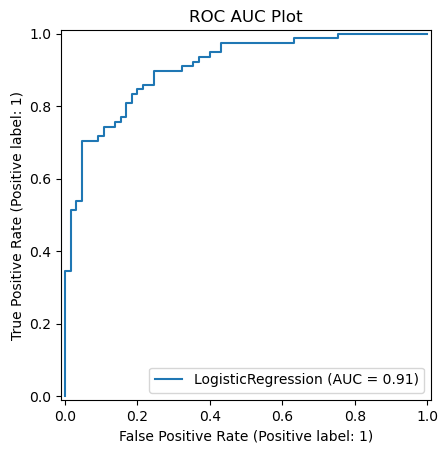

In [427]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(x_train, y_train)
model_score(clf)


              precision    recall  f1-score   support

           0       0.80      0.80      0.80        65
           1       0.83      0.83      0.83        78

    accuracy                           0.82       143
   macro avg       0.82      0.82      0.82       143
weighted avg       0.82      0.82      0.82       143



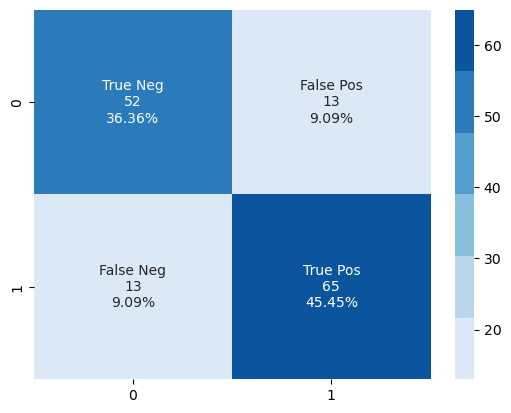

In [428]:
model_evaluation(clf)


Support Vector Classifier :

In [429]:
from sklearn.svm import SVC


In [430]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)


Accuracy: 81.12%
Cross Validation Score: 91.87%
ROC_AUC Score: 81.03%


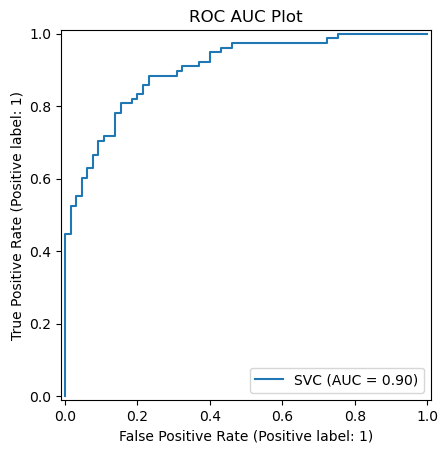

In [431]:
model_score(classifier_svc)


              precision    recall  f1-score   support

           0       0.79      0.80      0.79        65
           1       0.83      0.82      0.83        78

    accuracy                           0.81       143
   macro avg       0.81      0.81      0.81       143
weighted avg       0.81      0.81      0.81       143



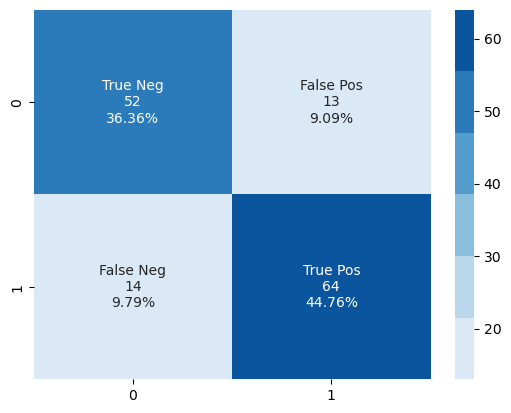

In [432]:
model_evaluation(classifier_svc)


Decision Tree Classifier

In [433]:
from sklearn.tree import DecisionTreeClassifier


In [434]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)


Accuracy: 82.52%
Cross Validation Score: 88.67%
ROC_AUC Score: 82.56%


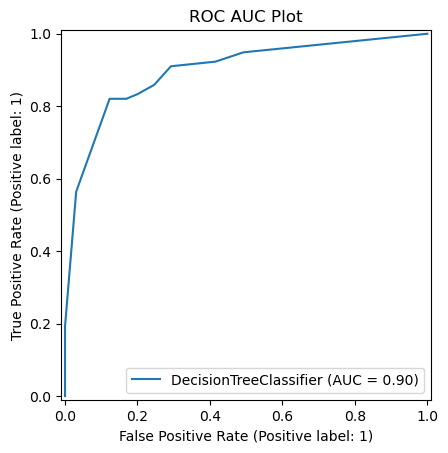

In [435]:
model_score(classifier_dt)


              precision    recall  f1-score   support

           0       0.79      0.83      0.81        65
           1       0.85      0.82      0.84        78

    accuracy                           0.83       143
   macro avg       0.82      0.83      0.82       143
weighted avg       0.83      0.83      0.83       143



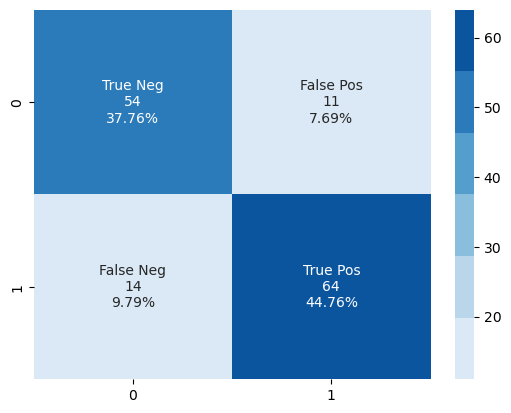

In [436]:
model_evaluation(classifier_dt)


Random Forest Classifier

In [437]:
from sklearn.ensemble import RandomForestClassifier



In [438]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)


Accuracy: 83.92%
Cross Validation Score: 93.37%
ROC_AUC Score: 83.59%


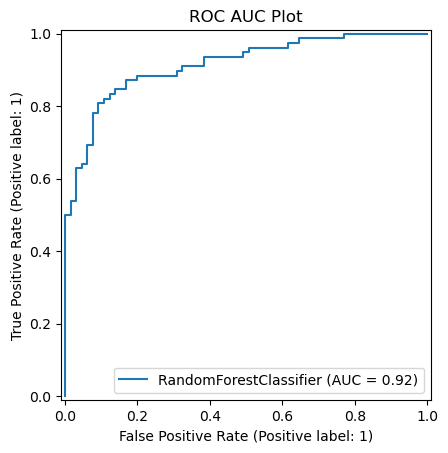

In [439]:
model_score(classifier_rf)


              precision    recall  f1-score   support

           0       0.84      0.80      0.82        65
           1       0.84      0.87      0.86        78

    accuracy                           0.84       143
   macro avg       0.84      0.84      0.84       143
weighted avg       0.84      0.84      0.84       143



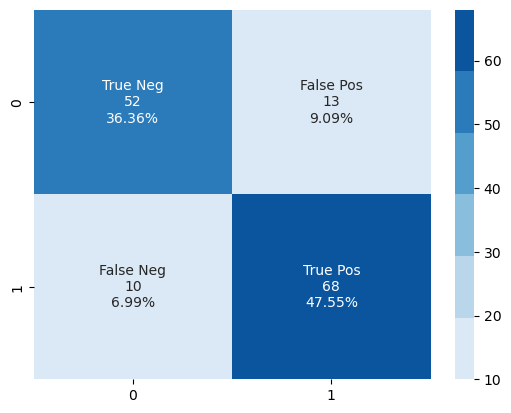

In [440]:
model_evaluation(classifier_rf)


K-nearest Neighbors Classifier 

In [441]:
from sklearn.neighbors import KNeighborsClassifier


In [442]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)


Accuracy: 80.42%
Cross Validation Score: 88.76%
ROC_AUC Score: 80.64%


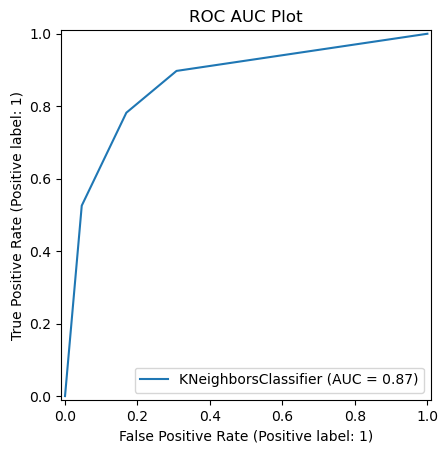

In [443]:
model_score(classifier_knn)


              precision    recall  f1-score   support

           0       0.76      0.83      0.79        65
           1       0.85      0.78      0.81        78

    accuracy                           0.80       143
   macro avg       0.80      0.81      0.80       143
weighted avg       0.81      0.80      0.80       143



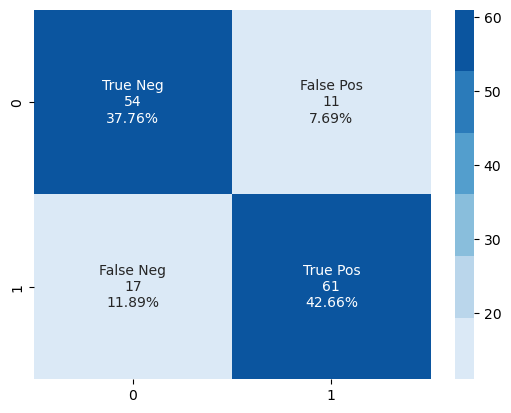

In [444]:
model_evaluation(classifier_knn)


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

models = {
    "Linear Regression": clf,
    "Random Forest": classifier_rf,
    "K-Nearest Neighbors": classifier_knn,
    "Decision Tree": classifier_dt,
    "Support Vector Classifier": classifier_svc,
    "Gradient Boosting Classifier": modelGBC
}

results = []

for name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": round(accuracy, 4)})

accuracy_df = pd.DataFrame(results)
print(accuracy_df)


                          Model  Accuracy
0             Linear Regression    0.8182
1                 Random Forest    0.8392
2           K-Nearest Neighbors    0.8042
3                 Decision Tree    0.8252
4     Support Vector Classifier    0.8112
5  Gradient Boosting Classifier    0.8462


In [446]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
def user_predict():
    try:
        input_list = []
        columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
                   'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
        
        for col in columns:
            val = input(f"Enter the value for {col}: ")
            input_list.append(val)

        input_df = pd.DataFrame([input_list], columns=columns)

        numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
        input_df[numeric_cols] = input_df[numeric_cols].astype(float)

        for col in categorical_cols:
            le = le_dict[col]
            val = input_df[col][0]
            if val not in le.classes_:
                print(f"Unknown category for {col}: {val}")
                return
            input_df[col] = le.transform([val])

        input_df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR']] = scaler.transform(input_df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR']])
        input_df[['Oldpeak']] = mms.transform(input_df[['Oldpeak']])

        input_df = input_df[x.columns]

        prediction = clf.predict(input_df)
        if prediction[0] == 0:
            print('The Person does not have a Heart Disease')
        else:
            print('The Person has Heart Disease')
    except Exception as e:
        print("An Error Occured:", e)


In [ ]:
from unittest.mock import patch

test_inputs = [
    '70', 'Male', 'ASY', '180', '320', '1', 'ST', '90', 'Y', '6.5', 'Down',

    '45', 'Female', 'NAP', '120', '170', '0', 'Normal', '170', 'N', '0.0', 'Up'
]

with patch('builtins.input', side_effect=test_inputs):
    print("First test result:")
    user_predict()
    print("\nSecond test result:")
    user_predict()


Birinci test sonucu:
The Person has Heart Disease

İkinci test sonucu:
The Person does not have a Heart Disease


In [449]:
x.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [ ]:
import joblib

joblib.dump({
    'model': modelGBC,
    'scaler': scaler,
    'mms': mms,
    'le_dict': le_dict,
    'feature_names': list(x.columns),  
    'scaler_features': cols_to_scale,  
    'mms_features': ['Oldpeak']        
}, "heart_model.pkl")  

['heart_model.pkl']

In [451]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.349733,1,1,0.416117,1.088381,0,1,1.279800,0,0.015873,2
1,-0.399828,0,2,1.579384,-1.289359,0,1,0.629873,0,0.174603,1
2,-1.666368,1,1,-0.165517,0.957496,0,2,-1.726112,0,0.015873,2
3,-0.505373,0,0,0.299790,-0.547678,0,1,-1.319907,1,0.253968,1
4,0.127897,1,2,0.997751,-0.962147,0,1,-0.751222,0,0.015873,2
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.822008,1,3,-1.328784,0.543028,0,1,-0.345017,0,0.206349,1
914,1.605528,1,0,0.648770,-1.005775,1,1,0.020567,0,0.555556,1
915,0.444533,1,0,-0.165517,-2.358251,0,1,-1.035565,1,0.206349,1
916,0.444533,0,1,-0.165517,-0.067768,0,0,1.361041,0,0.015873,1
